In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clustering.fit(X)
labels = clustering.labels_

In [6]:
labels

array([-1,  2,  5,  2, -1,  2,  5, -1,  5,  2,  5, -1,  5,  2,  5,  2, -1,
        2, -1, -1, -1,  2,  5,  2,  5, -1, -1, -1, -1, -1,  5,  2,  5, -1,
        5, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  7, -1,  6, -1,  7,  3,  6,  3,  6, -1,  6,  3,  7,
        3,  6,  3,  6,  3,  7, -1,  7,  3,  7, -1,  6, -1,  7,  3,  7,  3,
        6,  3,  7,  3,  6,  3,  6, -1,  6,  3,  7,  4, -1,  4,  7,  4, -1,
        4, -1,  4,  7,  4,  7,  4, -1,  4, -1, -1, -1,  4, -1, -1, -1,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
supervised=pd.DataFrame(dataset)

In [8]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
supervised['Cluster_group']=labels

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [13]:
supervised.to_csv("cluster.csv",index=False)

In [14]:
supervised.columns[3]

'Annual Income (k$)'

In [15]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

C:\anaconda 3\envs\myenv\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


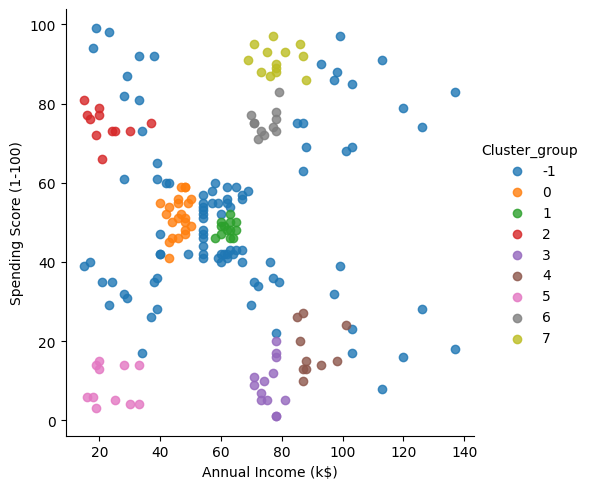

In [16]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)